In [1]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lst_model = ['vgg19', 'resnet', 'vgg16',  'xception', 'inception_v3']
classes = ['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']
PATH_MODEL = '/data/workspace_files/Ocular_dataset/'

In [3]:
def load_data(file_x, file_y):

    x = np.load('/data/workspace_files/Ocular_dataset/'+file_x)
    y = np.load('/data/workspace_files/Ocular_dataset/'+file_y)
     
    return (x , y)

In [4]:
import pandas as pd
from tqdm import tqdm
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, recall_score


def predict_from_npy(name_model, X, y, lst_fundus):

    #lecture du fichier de sauvegarde modele
    model = keras.models.load_model(PATH_MODEL+'model_03_02_'+name_model+'.h5')

    #creation du dataframe
    df_1_ = pd.concat([pd.Series(lst_fundus), pd.Series(y)], axis=1)
    df_1_.columns = ['fundus', 'y']
    df_1_['y_pred']=''
    #prediction
    for i, img in tqdm(enumerate(X)):
        y_pred = model.predict(img.reshape(1,224,224,3))
        y_pred = classes[np.argmax(y_pred)]
        df_1_.y_pred.loc[i] = y_pred


    
    return df_1_

In [9]:
def compute_performance(df_1_):
    #performance modele
    f1_ = f1_score(y_true=df_1_.y, y_pred=df_1_.y_pred, average=None)
    loss_ = hamming_loss(y_true=df_1_.y, y_pred=df_1_.y_pred)
    recall_ = recall_score(y_true=df_1_.y, y_pred=df_1_.y_pred, average=None)
    accuracy_ = accuracy_score(y_true=df_1_.y, y_pred=df_1_.y_pred)
    return [f1_, loss_, recall_, accuracy_]

In [6]:
#creation du dataframe avec tous les resultats de performance
df_perf = pd.DataFrame(columns=['name', 'f1', 'loss', 'recall', 'accuracy'])

#lecture des fichiers npy 
(X, y) = load_data(file_x='X_test.npy', file_y='y_test.npy')
lst_fundus = np.load('/data/workspace_files/Ocular_dataset/'+'name_file_test.npy')

#creation du dataframe
df_pred = pd.concat([pd.Series(lst_fundus), pd.Series(y)], axis=1)
df_pred.columns = ['fundus', 'y']

for j,model_name in enumerate(lst_model):
    print(f'Start : {model_name}')
    df_tmp = predict_from_npy(model_name, X, y, lst_fundus)
    df_pred['y_pred_'+str(j)]=df_tmp['y_pred']
    tmp = compute_performance(df_tmp)
    df_perf.loc[len(df_perf)] = [model_name, tmp[0], tmp[1], tmp[2], tmp[3]]


Start : vgg19
Start : resnet
Start : vgg16
Start : xception
Start : inception_v3


4556it [04:34, 16.62it/s]
4556it [04:18, 17.61it/s]
4556it [04:11, 18.15it/s]
4556it [04:17, 17.69it/s]
4556it [04:41, 16.20it/s]


# Sauvegarde des dataframe en fichier JSON

In [21]:

# dataframe performance
with open(PATH_MODEL+'dataframe_perf.json', 'w') as f:
    f.write(df_perf.to_json(orient='index'))
    

In [ ]:

# dataframe prediction
with open(PATH_MODEL+'dataframe_pred.json', 'w') as f:
    f.write(df_pred.to_json(orient='index'))

# Lecture des fichiers JSON

In [3]:

df_perf = pd.read_json(PATH_MODEL+'dataframe_perf.json').transpose()

df_pred = pd.read_json(PATH_MODEL+'dataframe_pred.json').transpose()

# Matrices de confusion

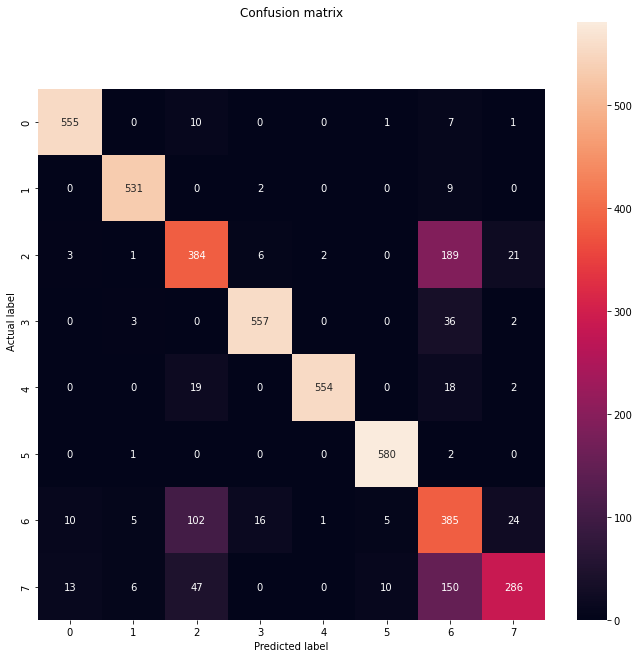

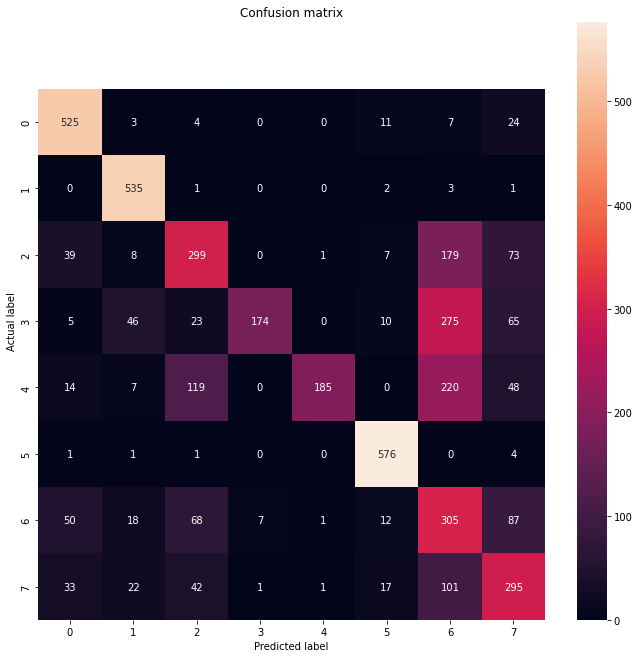

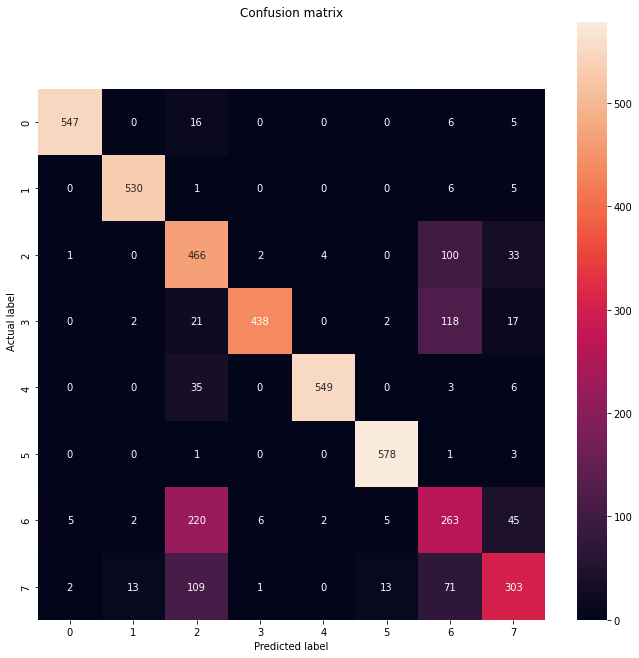

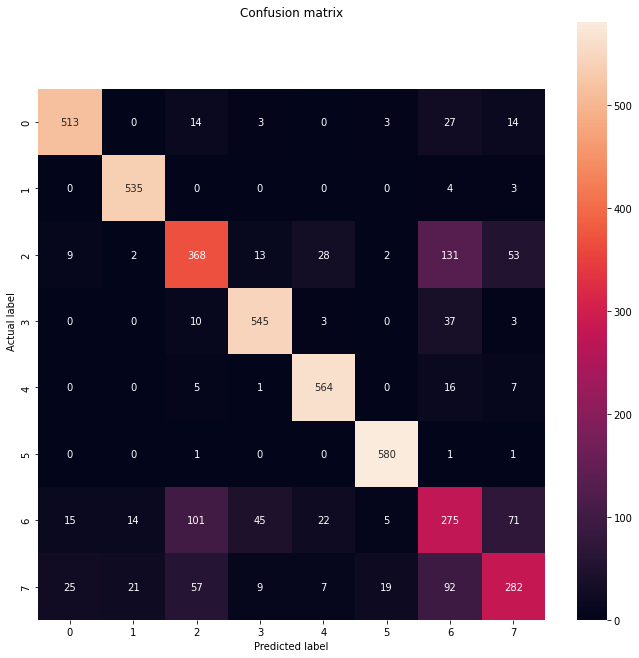

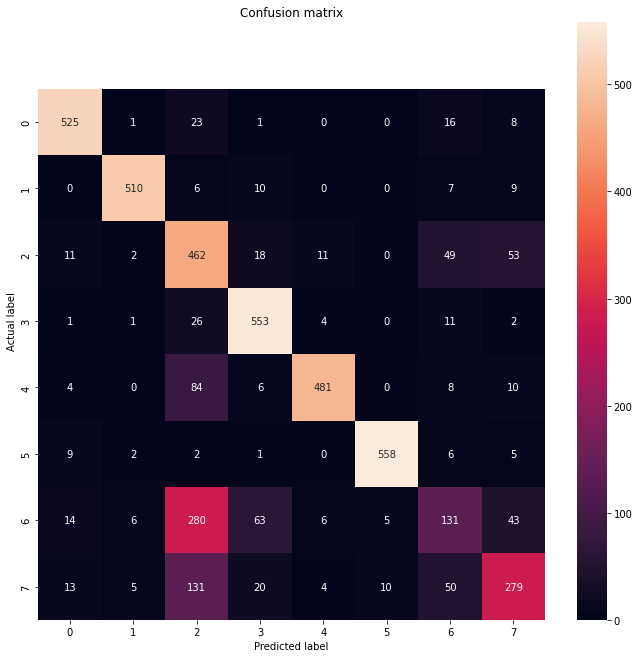

In [33]:
import sys
sys.path.insert(0,'/data/workspace_files/')

from Advance_plotting import Plotter

ohe = OneHotEncoder()
ohe.fit(X=df_pred.y.to_numpy().reshape(-1,1))


for j,model_name in enumerate(lst_model):
    plotter = Plotter(['AMD', 'Cataract', 'Diabetes', 'Glaucoma','Hypertension', 'Myopia', 'Normal', 'Others'], model_type=model_name)
    plotter.plot_confusion_matrix_generic(y_true=ohe.transform(df_pred.y.to_numpy().reshape(-1,1)), 
                                      predictions= ohe.transform(df_pred['y_pred_'+str(j)].to_numpy().reshape(-1,1)))
    

In [10]:
df_perf

,name,f1,loss,recall,accuracy
0,vgg19,"[0.9610389610000001, 0.9752066116, 0.657534246...",0.158911,"[0.9668989547000001, 0.979704797, 0.6336633663...",0.841089
1,resnet,"[0.8460918614, 0.9052453469, 0.5141874463, 0.4...",0.364794,"[0.9146341463000001, 0.9870848708000001, 0.493...",0.635206
2,vgg16,"[0.9689991143000001, 0.9733700643000001, 0.631...",0.193591,"[0.9529616725000001, 0.9778597786000001, 0.768...",0.806409
3,xception,"[0.9031690141000001, 0.960502693, 0.6333907057...",0.196225,"[0.8937282230000001, 0.9870848708000001, 0.607...",0.803775
4,inception_v3,"[0.9122502172, 0.9541627689000001, 0.570370370...",0.232002,"[0.9146341463000001, 0.9409594096, 0.762376237...",0.767998
5,classifierMLP,"[0.9278688525000001, 0.9775700935, 0.672323759...",0.215101,"[0.9860627178, 0.9649446494, 0.849834983500000...",0.784899


In [11]:
df_perf = df_perf.drop(df_perf.shape[0]-1)

## Loss

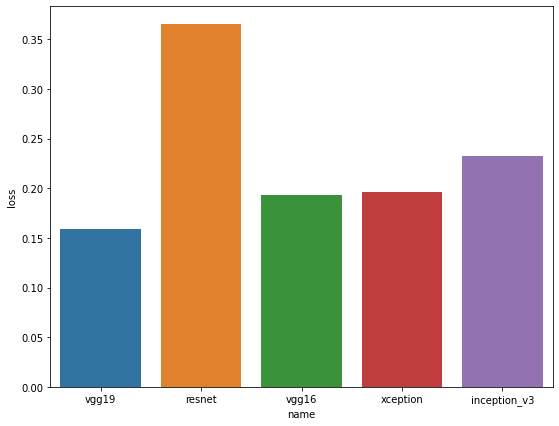

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
sns.barplot(y=df_perf.loss,x=df_perf.name)
plt.show()

## F1 Score

In [19]:
df_f1 = pd.DataFrame(columns=['name', 'f1', 'classe'])
for i in range(len(df_perf)):
    for j in range(len(df_perf.f1[i])):
        df_f1.loc[len(df_f1)] = [df_perf.name[i], df_perf.f1[i][j], classes[j]]

### Affichage F1 score par classe

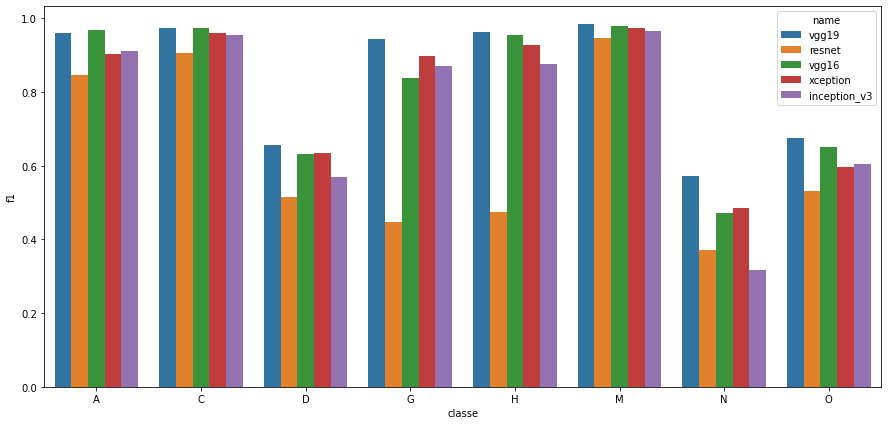

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(data = df_f1, y='f1', hue='name', x='classe')
plt.show()

### Affichage F1 score par modele

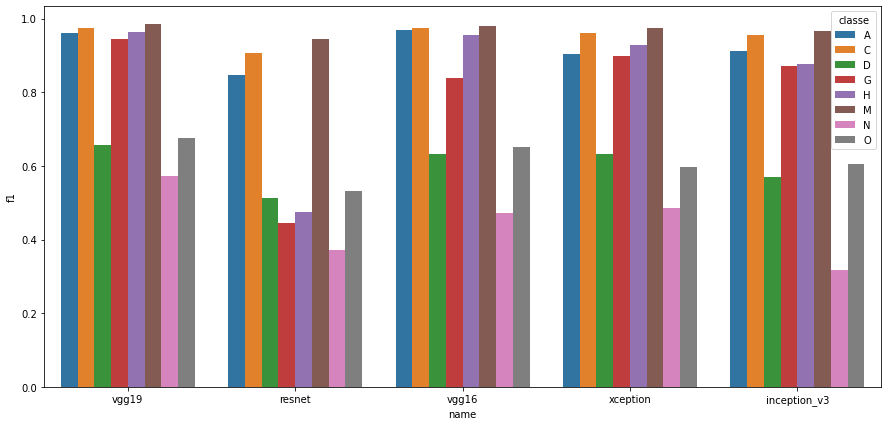

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(data = df_f1, y='f1', hue='classe', x='name')
plt.show()

## Recall

In [23]:
df_recall = pd.DataFrame(columns=['name', 'recall', 'classe'])
for i in range(len(df_perf)):
    for j in range(len(df_perf.recall[i])):
        df_recall.loc[len(df_recall)] = [df_perf.name[i], df_perf.recall[i][j], classes[j]]

### Affichage recall par classe

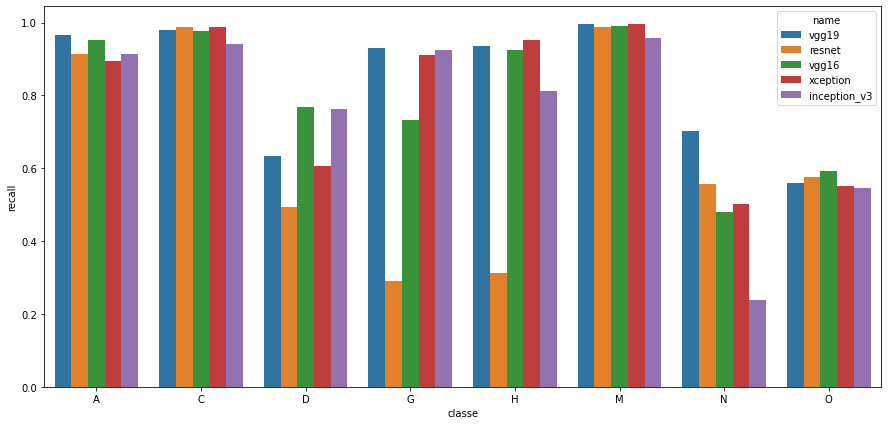

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(data = df_recall, y='recall', hue='name', x='classe')
plt.show()

### Affichage recall par modele

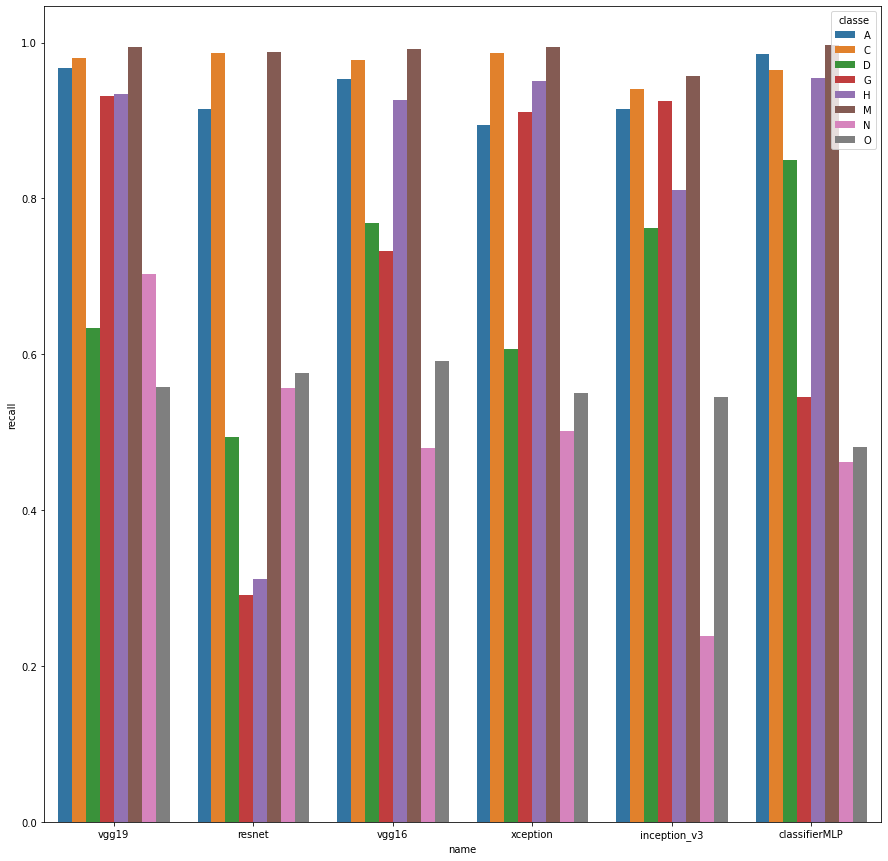

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(data = df_recall, y='recall', hue='classe', x='name')
plt.show()

## Accuracy

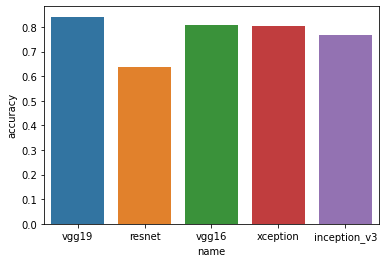

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=df_perf.accuracy,x=df_perf.name)
plt.show()

In [30]:
df_perf[['name','accuracy']]

,name,accuracy
0,vgg19,0.841089
1,resnet,0.635206
2,vgg16,0.806409
3,xception,0.803775
4,inception_v3,0.767998


### Performance classifier

In [12]:
#creation du dataframe avec tous les resultats de performance
#df_perf = pd.DataFrame(columns=['name', 'f1', 'loss', 'recall', 'accuracy'])

#lecture des fichiers npy 
(X, y) = load_data(file_x='X_test.npy', file_y='y_test.npy')
lst_fundus = np.load('/data/workspace_files/Ocular_dataset/'+'name_file_test.npy')

#creation du dataframe
df_pred = pd.concat([pd.Series(lst_fundus), pd.Series(y)], axis=1)
df_pred.columns = ['fundus', 'y']

In [13]:
def predict_from_npy_2(name_model, X, y, lst_fundus):

    #lecture du fichier de sauvegarde modele
    model = keras.models.load_model(PATH_MODEL+'model_03_02_'+name_model+'.h5')

    #prediction
    for i, img in tqdm(enumerate(X)):
        y_pred = model.predict(img.reshape(1,224,224,3))
        #y_pred = classes[np.argmax(y_pred)]
        #df_1_.y_pred.loc[i] = y_pred
        if i==0:
            tab_y_pred = y_pred
        else:
            tab_y_pred = np.concatenate((tab_y_pred, y_pred), axis=0)


    
    return tab_y_pred

In [14]:
# Calcul des predictions (probabilité) pour chaque modele
for j,model_name in enumerate(lst_model):
    print(f'Start : {model_name}')
    tmp = predict_from_npy_2(model_name, X, y, lst_fundus)
    if j==0:
        result = tmp
    if j>0:
        result = np.concatenate((result.copy(), tmp), axis=1)


Start : vgg19
Start : resnet
Start : vgg16
Start : xception
Start : inception_v3


4556it [04:31, 16.76it/s]
4556it [04:19, 17.54it/s]
4556it [04:14, 17.88it/s]
4556it [04:21, 17.44it/s]
4556it [04:47, 15.87it/s]


In [15]:
#lecture du fichier de sauvegarde modele
model = keras.models.load_model(PATH_MODEL+'model_03_02_classifierMLP.h5')
#creation du dataframe pour la prediction
df_class = pd.concat([pd.Series(lst_fundus), pd.Series(y)], axis=1)
df_class.columns = ['fundus', 'y']
df_class['y_pred']=''

#calcul des predictions
for k,res in enumerate(result):
    df_class['y_pred'][k]= classes[np.argmax(model.predict(res.reshape(1,40)))]

In [20]:

#calcul des performances
tmp = compute_performance(df_class)
df_perf.loc[len(df_perf)] = ['classifierMLP', tmp[0], tmp[1], tmp[2], tmp[3]]

In [17]:
# dataframe prediction
with open(PATH_MODEL+'dataframe_pred_classifier.json', 'w') as f:
    f.write(df_class.to_json(orient='index'))

# Matrice de confusion classifier

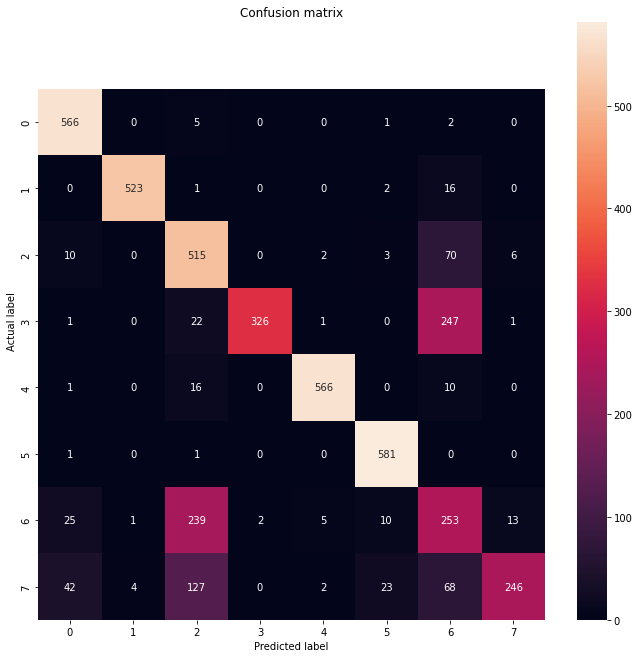

In [19]:
import sys
sys.path.insert(0,'/data/workspace_files/')

from Advance_plotting import Plotter

ohe = OneHotEncoder()
ohe.fit(X=df_class.y.to_numpy().reshape(-1,1))

plotter = Plotter(['AMD', 'Cataract', 'Diabetes', 'Glaucoma','Hypertension', 'Myopia', 'Normal', 'Others'], model_type='classifier')
plotter.plot_confusion_matrix_generic(y_true=ohe.transform(df_class.y.to_numpy().reshape(-1,1)), 
                                      predictions= ohe.transform(df_class['y_pred'].to_numpy().reshape(-1,1)))

In [22]:

df_perf

,name,f1,loss,recall,accuracy
0,vgg19,"[0.9610389610000001, 0.9752066116, 0.657534246...",0.158911,"[0.9668989547000001, 0.979704797, 0.6336633663...",0.841089
1,resnet,"[0.8460918614, 0.9052453469, 0.5141874463, 0.4...",0.364794,"[0.9146341463000001, 0.9870848708000001, 0.493...",0.635206
2,vgg16,"[0.9689991143000001, 0.9733700643000001, 0.631...",0.193591,"[0.9529616725000001, 0.9778597786000001, 0.768...",0.806409
3,xception,"[0.9031690141000001, 0.960502693, 0.6333907057...",0.196225,"[0.8937282230000001, 0.9870848708000001, 0.607...",0.803775
4,inception_v3,"[0.9122502172, 0.9541627689000001, 0.570370370...",0.232002,"[0.9146341463000001, 0.9409594096, 0.762376237...",0.767998
5,classifierMLP,"[0.9278688524590164, 0.9775700934579439, 0.672...",0.215101,"[0.9860627177700348, 0.9649446494464945, 0.849...",0.784899
